Homework 12
====
#### CHE 116: Numerical Methods and Statistics

4/19/2018

----

Homework Requirements:

1. Write all equations in $\LaTeX$
2. Simplify all expressions
2. Put comments in your Python code
3. Explain or show your work
4. Follow the academic honesty guidelines in the syllabus

-----

In [1]:
import math
import numpy as np
from sympy import symbols,solve
from scipy.misc import comb, factorial
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as ss
from scipy.integrate import quad
import random
from math import sqrt, pi, erf
from scipy import optimize as opt
from scipy.optimize import minimize
from scipy.optimize import newton,root
import scipy.optimize
import numpy.linalg as linalg

1\. Conceptual Questions (20 Points)
====

*Answer in Markdown* 2 Points each

1. What assumption do we make on the noise terms when doing linear regression? How can we check it?

2. Your friend tells you that it's important to minimize both the SSR and TSS. What's wrong with minimizing the TSS?

3. How do you justify the presence of a slope?

4. What is the best numeric value or statistic for justifying the existence of a correlation?

5. What should you plot to justify an ordinary 4-dimensional least squares regression?

6. Why do we use different number of deducted degrees of freedom when doing hypothesis testing vs performing the regression?

7. Write a model equation for 3-dimensional ordinary least squares regression with an intercept. For example, a one dimensional model equation without an intercept would be $y = \beta_0 x + \epsilon$

8. Write a model equation for when $y \propto \ln{x}$. Assume no intercept

9. Write a model equation for a person's life expectancy ($l$) assuming it depends on gender ($s$) and if the person eats vegetables ($v$). Assume for this problem that gender and eating vegetables are both binary (0 or 1). 

10. Write a model equation for homework performanced ($h$) based on music genre listended to while working. The following genres are conisdered: Kwaito, Electroswing, and Djent Metal. You can only listen to one genre at a time. Use the letters $k$, $e$, and $d$.

1.1 The noise comes from a normal distribution. This is checked by using the shapiro's wilk test <br>

1.2 TTS is a constant so cant be minimized.. It cannot be changed because it will not be the same data being investigated. 

1.3 spearman's test to justify existance of correlation.

Then use regression. The regression coefficient is the slope b of the regression line. Use confidence interval fr paremeters and see if it is not zero.If confidence interval of slope's paremeter is not zero then you are confident that there is zero.

1.4 The p-value from the the spearman's test to justify existance of correlation.

1.5
Plot the exact solutions and the least squares. Plot histogram of residuals



1.6  For hypothesis the paremeter investigated is assumed to be zero so we have N-(D-1) of 1 because only one thing being tested while 
 <br>Regression N-D where D is deducted degree of freedom which depends on number of paremeters..

1.7  $y=\beta_0 x_0+ \beta_1 x_1 + \beta_2 x_2 + \alpha \epsilon$
 
 

1.8 $ y=\beta In(x)  + \epsilon$

1.9 $$ l= \beta_0 + \beta_s \delta_s+ \beta_v \delta_v + \beta_{sv} \delta_s \delta_v + \epsilon$$

1.10$$ h = \beta_0 + \beta_k \delta_k + \beta_e \delta_e + \beta_d \delta_d + \epsilon$$

2\. Short Answer Questions (16 Points)
====

*Answer in Python or Markdown as appropiate* 4 Points each

1. If $\sigma_{xy} = -2.1$, $\sigma_{x}^2 = 3.5$, $\sigma_{y}^2  = 1.7$, what is the best fit slope? How does it change if the intercept is $-2.1$?

2. If your model equation is $y = \beta_0 + \beta_1 x + \beta_2 z + \epsilon$, what is the deducted degrees of freedom?

3. If $N = 12$, $D = 2$, and $S^2_{\beta_0} = 2.5$, what is the width of a 90% confidence interval for $\beta_0$?

4. If your best fit intercept is $\hat{\alpha} = 3$ with a standard error of $0.7$, what is the $p$-value for the existence of the that intercept? Take $N = 15$ and assume it's 1D OLS.


2.1 The best fit slope is   $ \sigma_{xy}/ \sigma_{x}^2 = \frac{-2.1}{3.5}= -0.6$

It does not  change anything because the best fit slope is not determined by the intercept.

2.2

ddof = 3  is the number of paremeters to be fitted.

In [87]:
2.3
# N<25 so t distribution N-D where d is number of fit coeffificents
s2_beta = 2.5
T = scipy.stats.t.ppf(0.95, 12 - 2)

print( T)
#beta_hat=

print('beta_hat', '+/-', T * np.sqrt(s2_beta), ' with 90% confidence')
print('the width', 2*T * np.sqrt(s2_beta))

1.8124611228107335
beta_hat +/- 2.86575265929404  with 90% confidence
the width 5.73150531858808


In [68]:
2.4
s_beta=0.7
alpha_hat=3
N=15
D=1
df=N-D
T=alpha_hat/s_beta #convert to a standard t distribution
p = 1 - (scipy.stats.t.cdf(T, df) - scipy.stats.t.cdf(-T, df))
print ('alpha = ', alpha_hat, ' T = ', T, ' p-value = ', p)

  

alpha =  3  T =  4.285714285714286  p-value =  0.000754107597154885


3\. Linearized Regression (24 Points)
===

Regress the following data to the model equation $y = \beta_0 \ln x + \beta_1 x + \beta_2 +\epsilon$ using a linearization so that you use ND OLS. Report the following:

1. [4 points] Justification for regression. Use words and statistics.
2. [12 points] Fit coefficients with 95% confidence intervals.
3. [4 points] Plot fit
4. [4 points] Show if residuals are normal

```python
x = [0.2, 0.29, 0.39, 0.48, 0.57, 0.66, 0.76, 0.85, 0.94, 1.04, 1.13, 1.22, 1.31, 1.41, 1.5]
y = [2.92, 2.58, 3.18, 4.27, 4.5, 3.93, 4.32, 4.57, 4.55, 4.7, 5.02, 4.21, 3.04, 4.98, 6.45]
```

In [61]:
3.1
x = np. array([0.2, 0.29, 0.39, 0.48, 0.57, 0.66, 0.76, 0.85, 0.94, 1.04, 1.13, 1.22, 1.31, 1.41, 1.5])
y =np.array( [2.92, 2.58, 3.18, 4.27, 4.5, 3.93, 4.32, 4.57, 4.55, 4.7, 5.02, 4.21, 3.04, 4.98, 6.45])

Null hypothesis is that x and y have no correlation

In [93]:
ss.spearmanr(x,y)
print('P value is less than 0.05 so the null hypothesis is rejected. There is a correlation between x and y so regression is justified')

P value is less than 0.05 so the null hypothesis is rejected. There is a correlation between x and y so regression is justified


In [29]:
import numpy.linalg as linalg

x_mat = np.column_stack((np.log(x),x, (np.ones(len(x))))) # B_2 is the one interms of np. ones
x_mat

array([[-1.60943791,  0.2       ,  1.        ],
       [-1.23787436,  0.29      ,  1.        ],
       [-0.94160854,  0.39      ,  1.        ],
       [-0.73396918,  0.48      ,  1.        ],
       [-0.56211892,  0.57      ,  1.        ],
       [-0.41551544,  0.66      ,  1.        ],
       [-0.27443685,  0.76      ,  1.        ],
       [-0.16251893,  0.85      ,  1.        ],
       [-0.0618754 ,  0.94      ,  1.        ],
       [ 0.03922071,  1.04      ,  1.        ],
       [ 0.12221763,  1.13      ,  1.        ],
       [ 0.19885086,  1.22      ,  1.        ],
       [ 0.27002714,  1.31      ,  1.        ],
       [ 0.3435897 ,  1.41      ,  1.        ],
       [ 0.40546511,  1.5       ,  1.        ]])

In [42]:

beta,*_ = linalg.lstsq(x_mat, y) 
print(beta)
print('')
yhat = x_mat @ beta
resids = yhat - y
SSR = np.sum(resids**2)
se2_epsilon = SSR / (len(x) - len(beta))
print(se2_epsilon)

[ 1.19374141 -0.07794449  4.6485906 ]

0.5822079542705133


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [43]:
se2_beta = se2_epsilon * linalg.inv(x_mat.transpose() @ x_mat)
print(se2_beta)

[[ 1.63144593 -2.2940163   2.4523975 ]
 [-2.2940163   3.46681262 -3.65334535]
 [ 2.4523975  -3.65334535  3.89949329]]


In [94]:
3.2
for i in range(len(beta)):
    #get our T-value for the confidence interval
    T = scipy.stats.t.ppf(0.975, len(x) - len(beta)) 
    # Get the width of the confidence interval using our previously computed standard error
    cwidth = T * np.sqrt(se2_beta[i,i]) 
    # print the result, using 2 - i to match our numbering above
    print("beta_{} is {} +/- {} with 95% confidence".format( i, beta[i], cwidth)) 

beta_0 is 1.193741414757536 +/- 2.7829555284648695 with 95% confidence
beta_1 is -0.07794449427600014 +/- 4.056814109626909 with 95% confidence
beta_2 is 4.648590598673859 +/- 4.30253104282523 with 95% confidence


[ 1.19374141 -0.07794449  4.6485906 ]


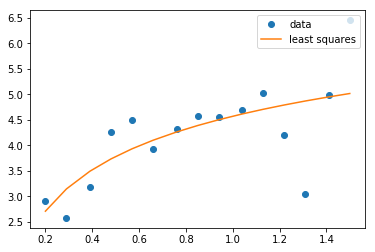

In [89]:
3.3
plt.plot(x,y,'o',label='data')
#plt.plot(x, B[0]*np.log(x)+ B[1]*x+B[2],'o')
plt.plot(x,x_mat.dot(beta),label='least squares')
print(beta)
plt.legend(loc='upper right')
plt.show()

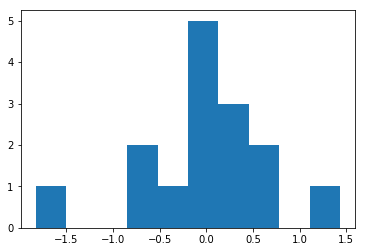

In [81]:
3.4 
plt.hist(y - y_hat)
plt.show()

In [53]:
scipy.stats.shapiro(y - y_hat)
print('Null hypothesis : Residual are normally distributed')
print('The p-value is 0.128 which is greater than 0.05 so the null hypothesis cannot be rejected. The residuals are normal')

Null hypothesis : Residual are normally distributed
The p-value is 0.128 which is greater than 0.05 so the null hypothesis cannot be rejected. The residuals are normal


4\. Non-Linear Regression (12 Points)
====

Repeat problem 3 with non-linear least squares instead. Only do the computation of the coefficients with confidence intervals. Be sure to write out your partials making up your $F$-matrix in markdown.

In [7]:
#Create an objective function, that takes in 1 D-dimensional argument and outputs a measure of the goodness of fit (SSR)
def obj(beta, x, y):
    beta_0= beta[0] #<- extract the elements of the beta vector
    beta_1= beta[1]
    beta_2=beta[2]
    yhat=beta_0*np.log(x)+beta_1 * x+beta_2 # <- This is our model equation
    resids = yhat - y #<- compute residuals
    SSR = np.sum(resids**2) #<- square and sum them
    return SSR

#Use the minimize (BGFS) function, with starting points
result = scipy.optimize.minimize(obj, x0=[1,1,1], args=(x, y))#x0[depends on the fit coefficient]
beta_opt = result.x #<- remember, we get out a whole bunch of extra stuff from optimization
print(result)

      fun: 6.986495451246288
 hess_inv: array([[ 1.40130947, -1.97019169,  2.10663496],
       [-1.97019169,  2.9770925 , -3.13788133],
       [ 2.10663496, -3.13788133,  3.34994186]])
      jac: array([-4.17232513e-07,  1.19209290e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 55
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([ 1.19374083, -0.07794365,  4.6485897 ])


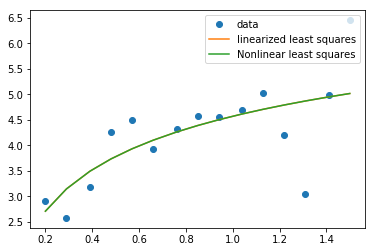

In [90]:
plt.plot(x,y, 'o', label='data')
plt.plot(x, beta[0]*np.log(x)+beta[1] * x+beta[2] , '-', label='linearized least squares')
plt.plot(x, beta_opt[0]*np.log(x)+beta_opt[1] * x+beta_opt[2] , '-', label='Nonlinear least squares')
plt.legend(loc='upper right')
plt.show()


$$\frac{\partial f}{\partial \beta_0} = ln(x)$$

$$\frac{\partial f}{\partial \beta_1} = x$$

$$\frac{\partial f}{\partial \beta_2} = 1$$

In [63]:
def build_F(beta, x):
    #Compute the individual partials for each data point
    beta_0_vec = np.log(x)
    beta_1_vec =x
    beta_2_vec=1
    #Now stack them together
    return np.column_stack( (beta_0_vec, beta_1_vec,np.ones(len(x)) ) )

print(build_F(beta_opt, x))

[[-1.60943791  0.2         1.        ]
 [-1.23787436  0.29        1.        ]
 [-0.94160854  0.39        1.        ]
 [-0.73396918  0.48        1.        ]
 [-0.56211892  0.57        1.        ]
 [-0.41551544  0.66        1.        ]
 [-0.27443685  0.76        1.        ]
 [-0.16251893  0.85        1.        ]
 [-0.0618754   0.94        1.        ]
 [ 0.03922071  1.04        1.        ]
 [ 0.12221763  1.13        1.        ]
 [ 0.19885086  1.22        1.        ]
 [ 0.27002714  1.31        1.        ]
 [ 0.3435897   1.41        1.        ]
 [ 0.40546511  1.5         1.        ]]


In [64]:
#The code below is our normal way of computing the standard error in the noise
resids = y - beta_opt[0]*np.log(x)-beta_opt[1] * x-beta_opt[2]
SSR = np.sum(resids**2)
s2_epsilon = SSR / (len(x) - len(beta_opt))
print(s2_epsilon)

0.5822079542705239


In [65]:
#Using our F, compute the standard error in beta
F = build_F(beta_opt, x)

s2_beta = s2_epsilon * linalg.inv(F.transpose().dot(F))
print(s2_beta)

[[ 1.63144593 -2.2940163   2.4523975 ]
 [-2.2940163   3.46681262 -3.65334535]
 [ 2.4523975  -3.65334535  3.89949329]]


In [67]:
#### We have standard error and can now compute a confidence interval
T = scipy.stats.t.ppf(0.975, len(x) - len(beta_opt))
c0_width = T * np.sqrt(s2_beta[0,0])
print('95% confidence interval for beta_0 is {} +/ {}'.format(beta_opt[0], c0_width))

c1_width = T * np.sqrt(s2_beta[1,1])
print('95% confidence interval for beta_1 is {} +/ {}'.format(beta_opt[1], c1_width))
c2_width = T * np.sqrt(s2_beta[1,1])
print('95% confidence interval for beta_2 is {} +/ {}'.format(beta_opt[2], c2_width))

95% confidence interval for beta_0 is 1.1937408266090073 +/ 2.7829555284648944
95% confidence interval for beta_1 is -0.07794365460287328 +/ 4.056814109626946
95% confidence interval for beta_2 is 4.64858969739695 +/ 4.056814109626946
